<a href="https://colab.research.google.com/github/chandankumar7/mycourses/blob/master/India_vs_World_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the required libraries
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# for date and time opeations
from datetime import datetime
# for file and folder operations
import os
# for regular expression opeations
import re
# for listing files in a folder
import glob
# for getting web contents
import requests 
# for scraping web contents
from bs4 import BeautifulSoup

In [ ]:
# get data

# link at which web data recides
link = 'https://www.mohfw.gov.in/'
# get web data
req = requests.get(link)
# parse web data
soup = BeautifulSoup(req.content, "html.parser")

In [ ]:
# find the table
# ==============
# our target table is the last table in the page

# get the table head
# table head may contain the column names, titles, subtitles
thead = soup.find_all('thead')[-1]
# print(thead)

# get all the rows in table head
# it usually have only one row, which has the column names
head = thead.find_all('tr')
# print(head)

# get the table tbody
# it contains the contents
tbody = soup.find_all('tbody')[-1]
# print(tbody)

# get all the rows in table body
# each row is each state's entry
body = tbody.find_all('tr')
# print(body)

In [ ]:
# get the table contents
# ======================

# container for header rows / column title
head_rows = []
# container for table body / contents
body_rows = []

# loop through the head and append each row to head
for tr in head:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    head_rows.append(row)
# print(head_rows)

# loop through the body and append each row to body
for tr in body:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    body_rows.append(row)
# print(head_rows)

In [ ]:
# save contents in a dataframe
# ============================
    
# skip last 3 rows, it contains unwanted info
# head_rows contains column title
df_bs = pd.DataFrame(body_rows[:len(body_rows)-6], 
                     columns=head_rows[0])         

# Drop 'S. No.' column
df_bs.drop('S. No.', axis=1, inplace=True)

# there are 36 states+UT in India
df_bs.head(36)

,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*
0,Andaman and Nicobar Islands,31,45,0,76
1,Andhra Pradesh,7164,5908,169,13241
2,Arunachal Pradesh,121,60,1,182
3,Assam,2108,5088,10,7206
4,Bihar,2034,7118,60,9212
5,Chandigarh,87,336,6,429
6,Chhattisgarh,558,2091,13,2662
7,Dadra and Nagar Haveli and Daman and Diu,118,60,0,178
8,Delhi,27847,52607,2623,83077
9,Goa,717,478,3,1198


In [ ]:
# date-time information
# =====================
#saving a copy of the dataframe
df_India = df_bs.copy()
# today's date
now  = datetime.now()
# format date to month-day-year
df_India['Date'] = now.strftime("%m/%d/%Y") 

# add 'Date' column to dataframe
df_India['Date'] = pd.to_datetime(df_India['Date'], format='%m/%d/%Y')

# df_India.head(36)

In [ ]:
# remove extra characters from 'Name of State/UT' column
df_India['Name of State / UT'] = df_India['Name of State / UT'].str.replace('#', '')
df_India['Deaths**'] = df_India['Deaths**'].str.replace('#', '')

In [ ]:
# latitude and longitude information
# ==================================

# latitude of the states
lat = {'Delhi':28.7041, 'Haryana':29.0588, 'Kerala':10.8505, 'Rajasthan':27.0238,
       'Telengana':18.1124, 'Uttar Pradesh':26.8467, 'Ladakh':34.2996, 'Tamil Nadu':11.1271,
       'Jammu and Kashmir':33.7782, 'Punjab':31.1471, 'Karnataka':15.3173, 'Maharashtra':19.7515,
       'Andhra Pradesh':15.9129, 'Odisha':20.9517, 'Uttarakhand':30.0668, 'West Bengal':22.9868, 
       'Puducherry': 11.9416, 'Chandigarh': 30.7333, 'Chhattisgarh':21.2787, 'Gujarat': 22.2587, 
       'Himachal Pradesh': 31.1048, 'Madhya Pradesh': 22.9734, 'Bihar': 25.0961, 'Manipur':24.6637, 
       'Mizoram':23.1645, 'Goa': 15.2993, 'Andaman and Nicobar Islands': 11.7401, 'Assam' : 26.2006, 
       'Jharkhand': 23.6102, 'Arunachal Pradesh': 28.2180, 'Tripura': 23.9408, 'Nagaland': 26.1584, 
       'Meghalaya' : 25.4670, 'Dadar Nagar Haveli' : 20.1809, 'Sikkim': 27.5330}

# longitude of the states
long = {'Delhi':77.1025, 'Haryana':76.0856, 'Kerala':76.2711, 'Rajasthan':74.2179,
        'Telengana':79.0193, 'Uttar Pradesh':80.9462, 'Ladakh':78.2932, 'Tamil Nadu':78.6569,
        'Jammu and Kashmir':76.5762, 'Punjab':75.3412, 'Karnataka':75.7139, 'Maharashtra':75.7139,
        'Andhra Pradesh':79.7400, 'Odisha':85.0985, 'Uttarakhand':79.0193, 'West Bengal':87.8550, 
        'Puducherry': 79.8083, 'Chandigarh': 76.7794, 'Chhattisgarh':81.8661, 'Gujarat': 71.1924, 
        'Himachal Pradesh': 77.1734, 'Madhya Pradesh': 78.6569, 'Bihar': 85.3131, 'Manipur':93.9063, 
        'Mizoram':92.9376, 'Goa': 74.1240, 'Andaman and Nicobar Islands': 92.6586, 'Assam' : 92.9376, 
        'Jharkhand': 85.2799, 'Arunachal Pradesh': 94.7278, 'Tripura': 91.9882, 'Nagaland': 94.5624,
        'Meghalaya' : 91.3662, 'Dadar Nagar Haveli' : 73.0169, 'Sikkim': 88.5122}

# add latitude column based on 'Name of State / UT' column
df_India['Latitude'] = df_India['Name of State / UT'].map(lat)

# add longitude column based on 'Name of State / UT' column
df_India['Longitude'] = df_India['Name of State / UT'].map(long)

df_India.head(36)

,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*,Date,Latitude,Longitude
0,Andaman and Nicobar Islands,31,45,0,76,2020-06-29,11.7401,92.6586
1,Andhra Pradesh,7164,5908,169,13241,2020-06-29,15.9129,79.7400
2,Arunachal Pradesh,121,60,1,182,2020-06-29,28.2180,94.7278
3,Assam,2108,5088,10,7206,2020-06-29,26.2006,92.9376
4,Bihar,2034,7118,60,9212,2020-06-29,25.0961,85.3131
5,Chandigarh,87,336,6,429,2020-06-29,30.7333,76.7794
6,Chhattisgarh,558,2091,13,2662,2020-06-29,21.2787,81.8661
7,Dadra and Nagar Haveli and Daman and Diu,118,60,0,178,2020-06-29,NaN,NaN
8,Delhi,27847,52607,2623,83077,2020-06-29,28.7041,77.1025
9,Goa,717,478,3,1198,2020-06-29,15.2993,74.1240


In [ ]:

# rename columns
    
df_India = df_India.rename(columns={'Cured/Discharged/Migrated' :'Cured/Discharged', 
                                      'Total Confirmed cases *': 'Confirmed', 
                                      'Total Confirmed cases ': 'Confirmed', 
                                      'Total Confirmed cases* ': 'Confirmed'})
df_India = df_India.rename(columns={'Cured/Discharged':'Cured'})
df_India = df_India.rename(columns={'Name of State / UT':'State/UnionTerritory'})
df_India = df_India.rename(columns={'Name of State / UT':'State/UnionTerritory'})

df_India = df_India.rename(columns=lambda x: re.sub('Total Confirmed cases \(Including .* foreign Nationals\) ',
                                                      'Total Confirmed cases',x))
df_India = df_India.rename(columns={'Deaths ( more than 70% cases due to comorbidities )':'Deaths', 
                                      'Deaths**':'Deaths'})

In [ ]:
# unique state names
df_India['State/UnionTerritory'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttarakhand',
       'Uttar Pradesh', 'West Bengal'], dtype=object)

In [ ]:
# number of missing values 
df_India.isna().sum()

State/UnionTerritory          0
Active Cases*                 0
Cured/Discharged/Migrated*    0
Deaths                        0
Total Confirmed cases*        0
Date                          0
Latitude                      2
Longitude                     2
dtype: int64

In [ ]:
# number of unique values 
df_India.nunique()

State/UnionTerritory          35
Active Cases*                 35
Cured/Discharged/Migrated*    34
Deaths                        26
Total Confirmed cases*        35
Date                           1
Latitude                      33
Longitude                     30
dtype: int64

In [ ]:
# saving data
# ===========

# file names as year-month-day.csv format
file_name = now.strftime("%Y_%m_%d")+' - COVID-19_India.csv'

# location for saving the file
file_loc = '/content/'

# save file as a scv file
df_India.to_csv(file_loc + file_name, index=False)

# df_India.head(36)

In [ ]:
# fix datatype
df_India['Date'] = pd.to_datetime(df_India['Date'])

In [ ]:
# rename state/UT names
df_India['State/UnionTerritory'].replace('Chattisgarh', 'Chhattisgarh', inplace=True)
df_India['State/UnionTerritory'].replace('Pondicherry', 'Puducherry', inplace=True) 

In [ ]:
df_India.head(36)

,State/UnionTerritory,Active Cases*,Cured/Discharged/Migrated*,Deaths,Total Confirmed cases*,Date,Latitude,Longitude
0,Andaman and Nicobar Islands,31,45,0,76,2020-06-29,11.7401,92.6586
1,Andhra Pradesh,7164,5908,169,13241,2020-06-29,15.9129,79.7400
2,Arunachal Pradesh,121,60,1,182,2020-06-29,28.2180,94.7278
3,Assam,2108,5088,10,7206,2020-06-29,26.2006,92.9376
4,Bihar,2034,7118,60,9212,2020-06-29,25.0961,85.3131
5,Chandigarh,87,336,6,429,2020-06-29,30.7333,76.7794
6,Chhattisgarh,558,2091,13,2662,2020-06-29,21.2787,81.8661
7,Dadra and Nagar Haveli and Daman and Diu,118,60,0,178,2020-06-29,NaN,NaN
8,Delhi,27847,52607,2623,83077,2020-06-29,28.7041,77.1025
9,Goa,717,478,3,1198,2020-06-29,15.2993,74.1240


In [ ]:
# complete data info
df_India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   State/UnionTerritory        35 non-null     object        
 1   Active Cases*               35 non-null     object        
 2   Cured/Discharged/Migrated*  35 non-null     object        
 3   Deaths                      35 non-null     object        
 4   Total Confirmed cases*      35 non-null     object        
 5   Date                        35 non-null     datetime64[ns]
 6   Latitude                    33 non-null     float64       
 7   Longitude                   33 non-null     float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 2.3+ KB


In [ ]:
# saving data
# ===========

# file names as year-month-day.csv format
file_name = now.strftime("%Y_%m_%d")+' - COVID-19_India_preprocessed.csv'

# location for saving the file
file_loc = '/content/'

# save file as a scv file
df_India.to_csv(file_loc + file_name, index=False)

In [ ]:
#Learn how to read a .csv file by creating a dataframe using pandas
# Reading the datasets
df= pd.read_csv('/content/2020_06_29 - COVID-19_India_preprocessed.csv')
df_india = df.copy()
df

,State/UnionTerritory,Active Cases*,Cured/Discharged/Migrated*,Deaths,Total Confirmed cases*,Date,Latitude,Longitude
0,Andaman and Nicobar Islands,31,45,0,76,2020-06-29,11.7401,92.6586
1,Andhra Pradesh,7164,5908,169,13241,2020-06-29,15.9129,79.7400
2,Arunachal Pradesh,121,60,1,182,2020-06-29,28.2180,94.7278
3,Assam,2108,5088,10,7206,2020-06-29,26.2006,92.9376
4,Bihar,2034,7118,60,9212,2020-06-29,25.0961,85.3131
5,Chandigarh,87,336,6,429,2020-06-29,30.7333,76.7794
6,Chhattisgarh,558,2091,13,2662,2020-06-29,21.2787,81.8661
7,Dadra and Nagar Haveli and Daman and Diu,118,60,0,178,2020-06-29,NaN,NaN
8,Delhi,27847,52607,2623,83077,2020-06-29,28.7041,77.1025
9,Goa,717,478,3,1198,2020-06-29,15.2993,74.1240


In [ ]:
total_cases = df['Total Confirmed cases*'].sum()
print('Total number of confirmed COVID 2019 cases across India till date (29th June, 2020):', total_cases)

Total number of confirmed COVID 2019 cases across India till date (29th June, 2020): 541033


In [ ]:
#Learn how to highlight your dataframe
df_temp = df.drop(['Latitude', 'Longitude', 'Date'], axis = 1) #Removing Date, Latitude and Longitude and other extra columns
df_temp.style.background_gradient(cmap='Reds')

,State/UnionTerritory,Active Cases*,Cured/Discharged/Migrated*,Deaths,Total Confirmed cases*
0,Andaman and Nicobar Islands,31,45,0,76
1,Andhra Pradesh,7164,5908,169,13241
2,Arunachal Pradesh,121,60,1,182
3,Assam,2108,5088,10,7206
4,Bihar,2034,7118,60,9212
5,Chandigarh,87,336,6,429
6,Chhattisgarh,558,2091,13,2662
7,Dadra and Nagar Haveli and Daman and Diu,118,60,0,178
8,Delhi,27847,52607,2623,83077
9,Goa,717,478,3,1198


In [ ]:
today = now.strftime("%Y_%m_%d")
total_cured = df['Cured/Discharged/Migrated*'].sum()
print("Total people who were cured as of "+today+" are: ", total_cured)
total_cases = df['Total Confirmed cases*'].sum()
print("Total people who were detected COVID+ve as of "+today+" are: ", total_cases)
total_death = df['Deaths'].sum()
print("Total people who died due to COVID19 as of "+today+" are: ",total_death)
total_active = total_cases-total_cured-total_death
print("Total active COVID19 cases as of "+today+" are: ",total_active)

Total people who were cured as of 2020_06_29 are:  321723
Total people who were detected COVID+ve as of 2020_06_29 are:  541033
Total people who died due to COVID19 as of 2020_06_29 are:  16475
Total active COVID19 cases as of 2020_06_29 are:  202835


In [ ]:
#Total Active  is the Total cases - (Number of death + Cured)
df['Total Active'] = df['Total Confirmed cases*'] - (df['Deaths'] + df['Cured/Discharged/Migrated*'])
total_active = df['Total Active'].sum()
print('Total number of active COVID 2019 cases across India:', total_active)
Tot_Cases = df.groupby('State/UnionTerritory')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 2019 cases across India: 202835


,Total Active
State/UnionTerritory,
Maharashtra,70622
Tamil Nadu,35659
Delhi,27847
Telangana,9000
Andhra Pradesh,7164
Gujarat,6712
Uttar Pradesh,6679
Karnataka,5476
West Bengal,5451


In [ ]:
import numpy as np
state_cases = df_india.groupby('State/UnionTerritory')['Total Confirmed cases*','Deaths','Cured/Discharged/Migrated*'].max().reset_index()

#state_cases = state_cases.astype({'Deaths': 'int'})
state_cases['Active'] = state_cases['Total Confirmed cases*'] - (state_cases['Deaths']+state_cases['Cured/Discharged/Migrated*'])
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Total Confirmed cases*"],2)
state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["Cured/Discharged/Migrated*"]/state_cases["Total Confirmed cases*"],2)
state_cases.sort_values('Total Confirmed cases*', ascending= False).fillna(0).style.background_gradient(cmap='Blues',subset=["Total Confirmed cases*"])\
                        .background_gradient(cmap='Blues',subset=["Deaths"])\
                        .background_gradient(cmap='Blues',subset=["Cured/Discharged/Migrated*"])\
                        .background_gradient(cmap='Blues',subset=["Active"])\
                        .background_gradient(cmap='Blues',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Blues',subset=["Cure Rate (per 100)"])

,State/UnionTerritory,Total Confirmed cases*,Deaths,Cured/Discharged/Migrated*,Active,Death Rate (per 100),Cure Rate (per 100)
19,Maharashtra,164626,7429,86575,70622,4.510000,52.590000
8,Delhi,83077,2623,52607,27847,3.160000,63.320000
29,Tamil Nadu,82275,1079,45537,35659,1.310000,55.350000
10,Gujarat,31320,1808,22800,6712,5.770000,72.800000
32,Uttar Pradesh,22147,660,14808,6679,2.980000,66.860000
34,West Bengal,17283,639,11193,5451,3.700000,64.760000
27,Rajasthan,17271,399,13611,3261,2.310000,78.810000
30,Telangana,14419,247,5172,9000,1.710000,35.870000
11,Haryana,13829,223,8917,4689,1.610000,64.480000
1,Andhra Pradesh,13241,169,5908,7164,1.280000,44.620000


In [ ]:
age_details = pd.read_csv('/content/AgeGroupDetails.csv')
india_covid_19 = pd.read_csv('/content/covid_19_india.csv')
hospital_beds = pd.read_csv('/content/HospitalBedsIndia.csv')
individual_details = pd.read_csv('/content/IndividualDetails.csv')
ICMR_details = pd.read_csv('/content/ICMRTestingDetails.csv')
ICMR_labs = pd.read_csv('/content/ICMRTestingLabs.csv')
state_testing = pd.read_csv('/content/StatewiseTestingDetails.csv')
population = pd.read_csv('/content/population_india_census2011.csv')

In [ ]:
india_covid_19['Date'] = pd.to_datetime(india_covid_19['Date'],dayfirst = True)
state_testing['Date'] = pd.to_datetime(state_testing['Date'])
ICMR_details['DateTime'] = pd.to_datetime(ICMR_details['DateTime'],dayfirst = True)
ICMR_details = ICMR_details.dropna(subset=['TotalSamplesTested', 'TotalPositiveCases'])

In [ ]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-04-2020.csv')


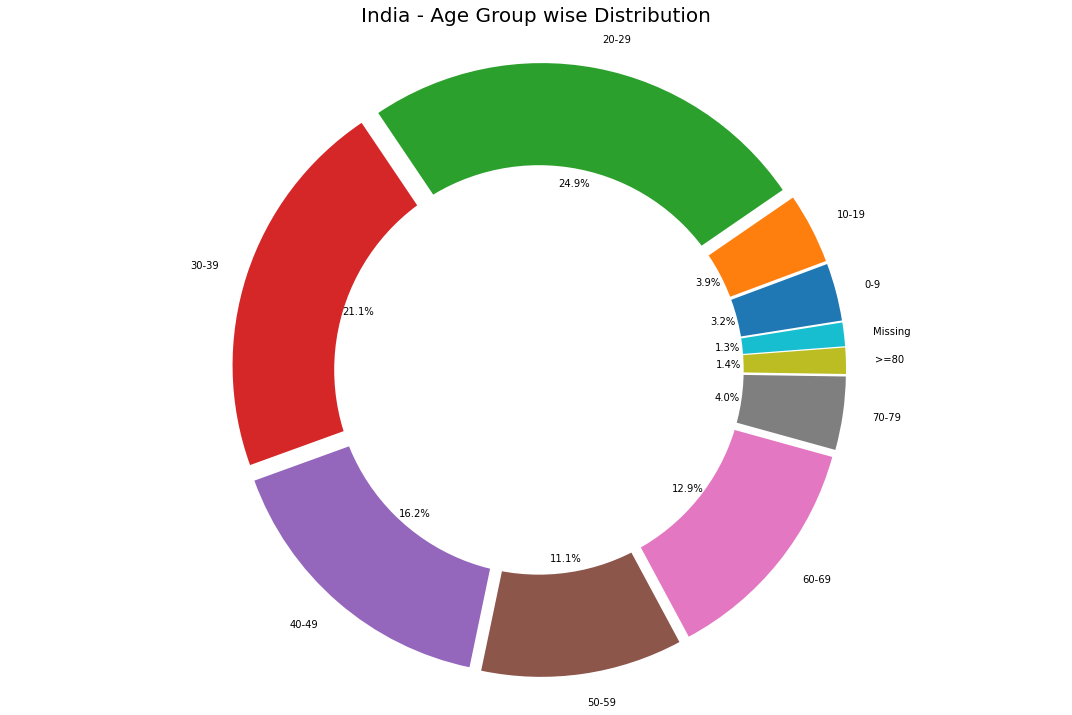

In [ ]:
labels = list(age_details['AgeGroup'])
sizes = list(age_details['TotalCases'])

explode = []

for i in labels:
    explode.append(0.05)
    
plt.figure(figsize= (15,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode =explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('India - Age Group wise Distribution',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

In [ ]:
dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
dates_india = dates[8:]

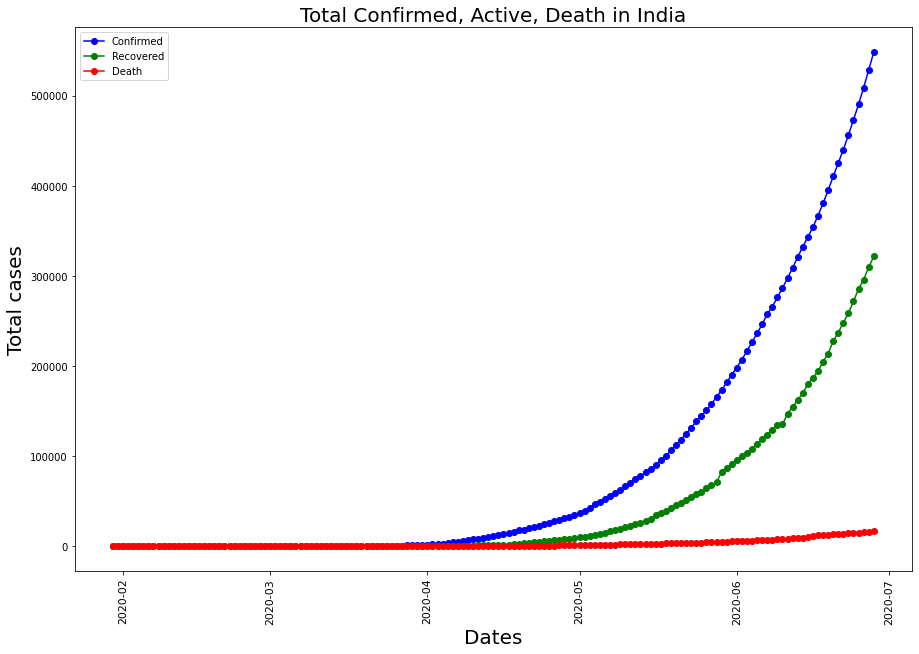

In [ ]:
tes = list(pd.to_datetime(dates))
dates_india = dates[8:]
df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()

k = df1[df1['Country/Region']=='India'].loc[:,'1/30/20':]
india_confirmed = k.values.tolist()[0] 

k = df2[df2['Country/Region']=='India'].loc[:,'1/30/20':]
india_deaths = k.values.tolist()[0] 

k = df3[df3['Country/Region']=='India'].loc[:,'1/30/20':]
india_recovered = k.values.tolist()[0] 

plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)

ax1 = plt.plot_date(y= india_confirmed,x= dates_india,label = 'Confirmed',linestyle ='-',color = 'b')
ax2 = plt.plot_date(y= india_recovered,x= dates_india,label = 'Recovered',linestyle ='-',color = 'g')
ax3 = plt.plot_date(y= india_deaths,x= dates_india,label = 'Death',linestyle ='-',color = 'r')
plt.legend()

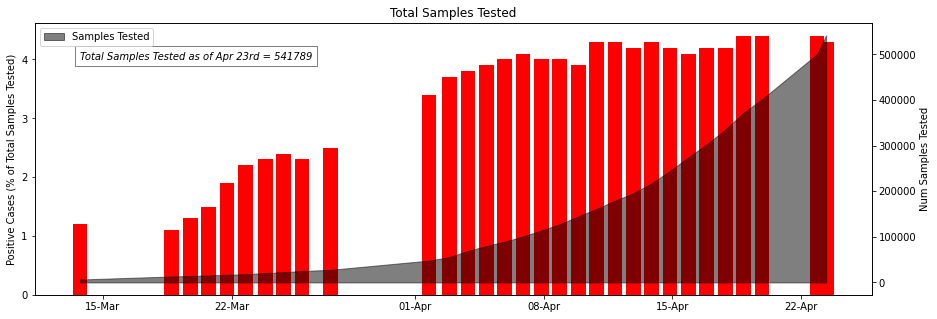

In [ ]:
import matplotlib.dates as mdates
ICMR_details['Percent_positive'] = round((ICMR_details['TotalPositiveCases']/ICMR_details['TotalSamplesTested'])*100,1)

fig, ax1 = plt.subplots(figsize= (15,5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax1.set_ylabel('Positive Cases (% of Total Samples Tested)')
ax1.bar(ICMR_details['DateTime'] , ICMR_details['Percent_positive'], color="red",label = 'Percentage of Positive Cases')
ax1.text(ICMR_details['DateTime'][0],4, 'Total Samples Tested as of Apr 23rd = 541789', style='italic',fontsize= 10,
        bbox={'facecolor': 'white' ,'alpha': 0.5, 'pad': 5})

ax2 = ax1.twinx()  
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax2.set_ylabel('Num Samples Tested')
ax2.fill_between(ICMR_details['DateTime'],ICMR_details['TotalSamplesTested'],color = 'black',alpha = 0.5,label = 'Samples Tested');

plt.legend(loc="upper left")
plt.title('Total Samples Tested')
plt.show()


In [ ]:
import json
# get response from the web page
response = requests.get('https://api.covid19india.org/state_test_data.json')

# get contents from the response
content = response.content

# parse the json file
parsed = json.loads(content)

# keys
parsed.keys()

dict_keys(['states_tested_data'])

In [ ]:
# save data in a dataframe
tested = pd.DataFrame(parsed['states_tested_data'])

# first few rows
tested.tail()

,coronaenquirycalls,cumulativepeopleinquarantine,negative,numcallsstatehelpline,numicubeds,numisolationbeds,numventilators,peopleinicu,peopleonventilators,populationncp2019projection,positive,source1,source2,state,tagpeopleinquarantine,tagtotaltested,testpositivityrate,testspermillion,testsperpositivecase,testsperthousand,totaln95masks,totalpeoplecurrentlyinquarantine,totalpeoplereleasedfromquarantine,totalppe,totaltested,unconfirmed,updatedon,_d5fpr
2536,,,,,948,,395,,,96906000,15173,https://www.wbhealth.gov.in/uploaded_files/cor...,,West Bengal,Government,Tested,3.53%,4435,28,4.43,931040,8585,92189,1558262,429766,,24/06/2020,NaN
2537,,,,,948,,395,,,96906000,15648,https://www.wbhealth.gov.in/uploaded_files/cor...,https://www.wbhealth.gov.in/pages/corona/bulletin,West Bengal,Government,Tested,3.56%,4533,28,4.53,946040,7865,93180,1569262,439258,,25/06/2020,NaN
2538,,,,,948,,395,,,96906000,16190,https://www.wbhealth.gov.in/uploaded_files/cor...,https://www.wbhealth.gov.in/pages/corona/bulletin,West Bengal,Government,Tested,3.61%,4631,28,4.63,956040,7330,93898,1582262,448795,,26/06/2020,NaN
2539,,,,,948,,395,,,96906000,16711,https://www.wbhealth.gov.in/uploaded_files/cor...,https://www.wbhealth.gov.in/pages/corona/bulletin,West Bengal,Government,Tested,3.65%,4730,27,4.73,966040,7181,94993,1596262,458343,,27/06/2020,NaN
2540,,,,,948,,395,,,96906000,17283,https://www.wbhealth.gov.in/uploaded_files/cor...,https://www.wbhealth.gov.in/pages/corona/bulletin,West Bengal,Government,Tested,3.69%,4839,27,4.84,976040,6937,95383,1606262,468906,,28/06/2020,NaN


In [ ]:
# fix datatype
tested['updatedon'] = pd.to_datetime(tested['updatedon'])

In [ ]:
# save file as a scv file
tested.to_csv('updated_tests_latest_state_level.csv', index=False)


In [ ]:
state_test_cases = tested.groupby(['updatedon','state'])['totaltested','populationncp2019projection','testpositivityrate',	'testsperpositivecase',	'testsperthousand','totalpeoplecurrentlyinquarantine'].max().reset_index()

In [ ]:
state_test_cases.head(36)

,updatedon,state,totaltested,populationncp2019projection,testpositivityrate,testsperpositivecase,testsperthousand,totalpeoplecurrentlyinquarantine
0,2020-01-04,Delhi,2621,19814000,0.00%,,0.13,
1,2020-01-04,Kerala,7965,35125000,3.33%,30,0.23,622
2,2020-01-04,West Bengal,659,96906000,5.61%,18,0.01,
3,2020-01-05,Andaman and Nicobar Islands,3754,397000,0.88%,114,9.46,643
4,2020-01-05,Andhra Pradesh,102460,52221000,1.43%,70,1.96,
5,2020-01-05,Arunachal Pradesh,724,1504000,0.28%,362,0.48,
6,2020-01-05,Assam,,34293000,,,0.00,
7,2020-01-05,Bihar,24118,119520000,1.93%,52,0.20,2156
8,2020-01-05,Chandigarh,1252,1179000,7.03%,14,1.06,
9,2020-01-05,Chhattisgarh,18039,28724000,0.24%,420,0.63,575


In [ ]:
state_test_cases = tested.groupby('state')['totaltested','populationncp2019projection','testpositivityrate',	'testsperpositivecase',	'testsperthousand','totalpeoplecurrentlyinquarantine'].max()
state_test_cases['testpositivityrate'] = state_test_cases['testpositivityrate'].str.replace('%', '')

In [ ]:
state_test_cases = state_test_cases.apply(pd.to_numeric)

In [ ]:
state_test_cases.nunique()

totaltested                         35
populationncp2019projection         34
testpositivityrate                  35
testsperpositivecase                23
testsperthousand                    33
totalpeoplecurrentlyinquarantine    25
dtype: int64

In [ ]:
state_test_cases.sort_values('totaltested', ascending= False).style.background_gradient(cmap='Blues',subset=["totaltested"])\
                        .background_gradient(cmap='Blues',subset=["populationncp2019projection"])\
                        .background_gradient(cmap='Blues',subset=["testpositivityrate"])\
                        .background_gradient(cmap='Blues',subset=["testsperpositivecase"])\
                        .background_gradient(cmap='Blues',subset=["testsperthousand"])\
                        .background_gradient(cmap='Blues',subset=["totalpeoplecurrentlyinquarantine"])
                       

,totaltested,populationncp2019projection,testpositivityrate,testsperpositivecase,testsperthousand,totalpeoplecurrentlyinquarantine
state,,,,,,
Haryana,99987,28672000,5.770000,87,7.920000,44759.000000
Jharkhand,99931,37403000,1.740000,99,3.560000,99641.000000
Kerala,99692,35125000,3.380000,83,5.800000,992.000000
Madhya Pradesh,99677,82232000,9.770000,26,4.000000,nan
Bihar,99108,119520000,5.180000,95,1.720000,802.000000
Chhattisgarh,98603,28724000,1.800000,95,4.660000,924.000000
Uttar Pradesh,98300,224979000,5.290000,41,2.680000,9911.000000
Karnataka,98081,65798000,2.790000,99,8.840000,nan
Rajasthan,97790,77264000,2.880000,49,9.590000,nan


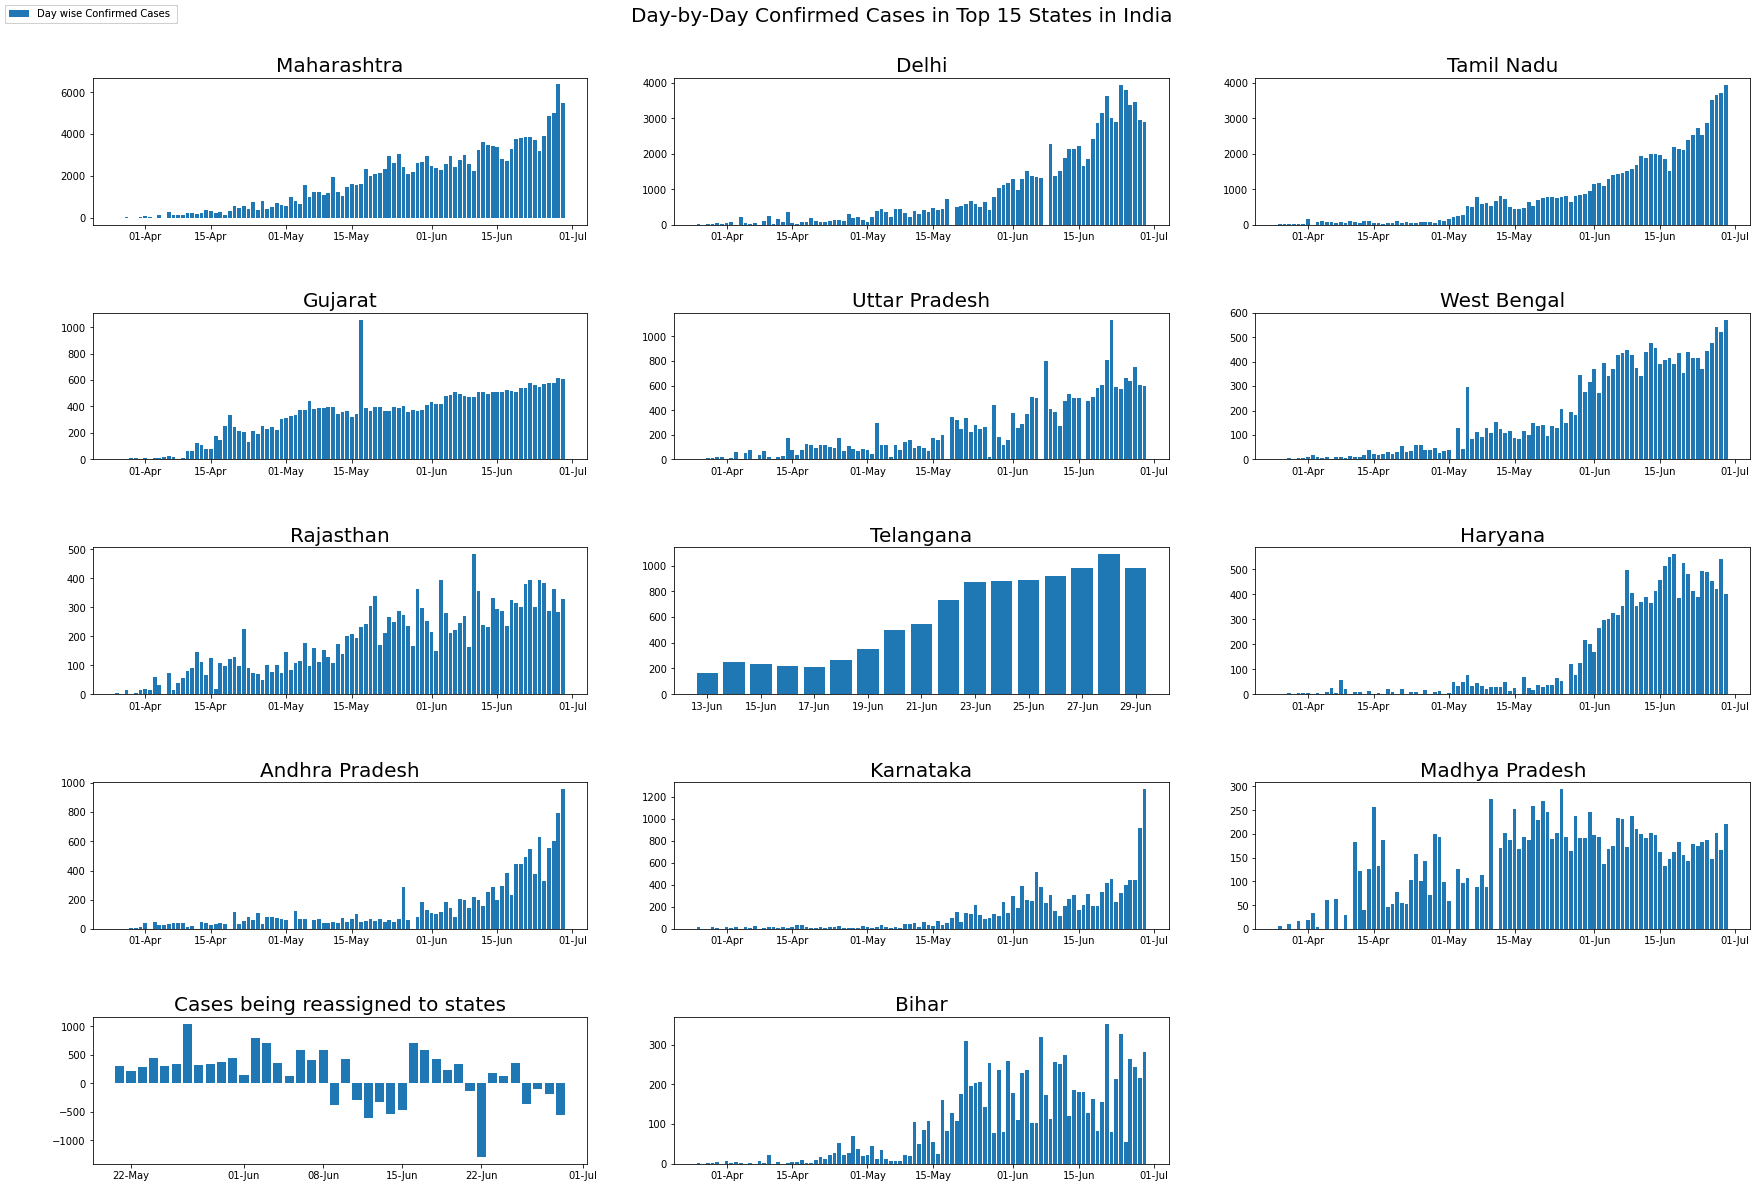

In [ ]:
all_state = list(df_India['State/UnionTerritory'].unique())

latest = india_covid_19[india_covid_19['Date'] > '24-03-20']
state_cases = latest.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()
latest['Active'] = latest['Confirmed'] - (latest['Deaths']- latest['Cured'])
state_cases = state_cases.sort_values('Confirmed', ascending= False).fillna(0)
states =list(state_cases['State/UnionTerritory'][0:15])

states_confirmed = {}
states_deaths = {}
states_recovered = {}
states_active = {}
states_dates = {}

for state in states:
    df = latest[latest['State/UnionTerritory'] == state].reset_index()
    k = []
    l = []
    m = []
    n = []
    for i in range(1,len(df)):
        k.append(df['Confirmed'][i]-df['Confirmed'][i-1])
        l.append(df['Deaths'][i]-df['Deaths'][i-1])
        m.append(df['Cured'][i]-df['Cured'][i-1])
        n.append(df['Active'][i]-df['Active'][i-1])

    states_confirmed[state] = k
    states_deaths[state] = l
    states_recovered[state] = m
    states_active[state] = n
    date = list(df['Date'])
    states_dates[state] = date[1:]
    
fig = plt.figure(figsize= (25,17))
plt.suptitle('Day-by-Day Confirmed Cases in Top 15 States in India',fontsize = 20,y=1.0)
k=0
for i in range(1,15):
    ax = fig.add_subplot(5,3,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    ax.bar(states_dates[states[k]],states_confirmed[states[k]],label = 'Day wise Confirmed Cases ') 
    plt.title(states[k],fontsize = 20)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1
plt.tight_layout(pad=5.0)

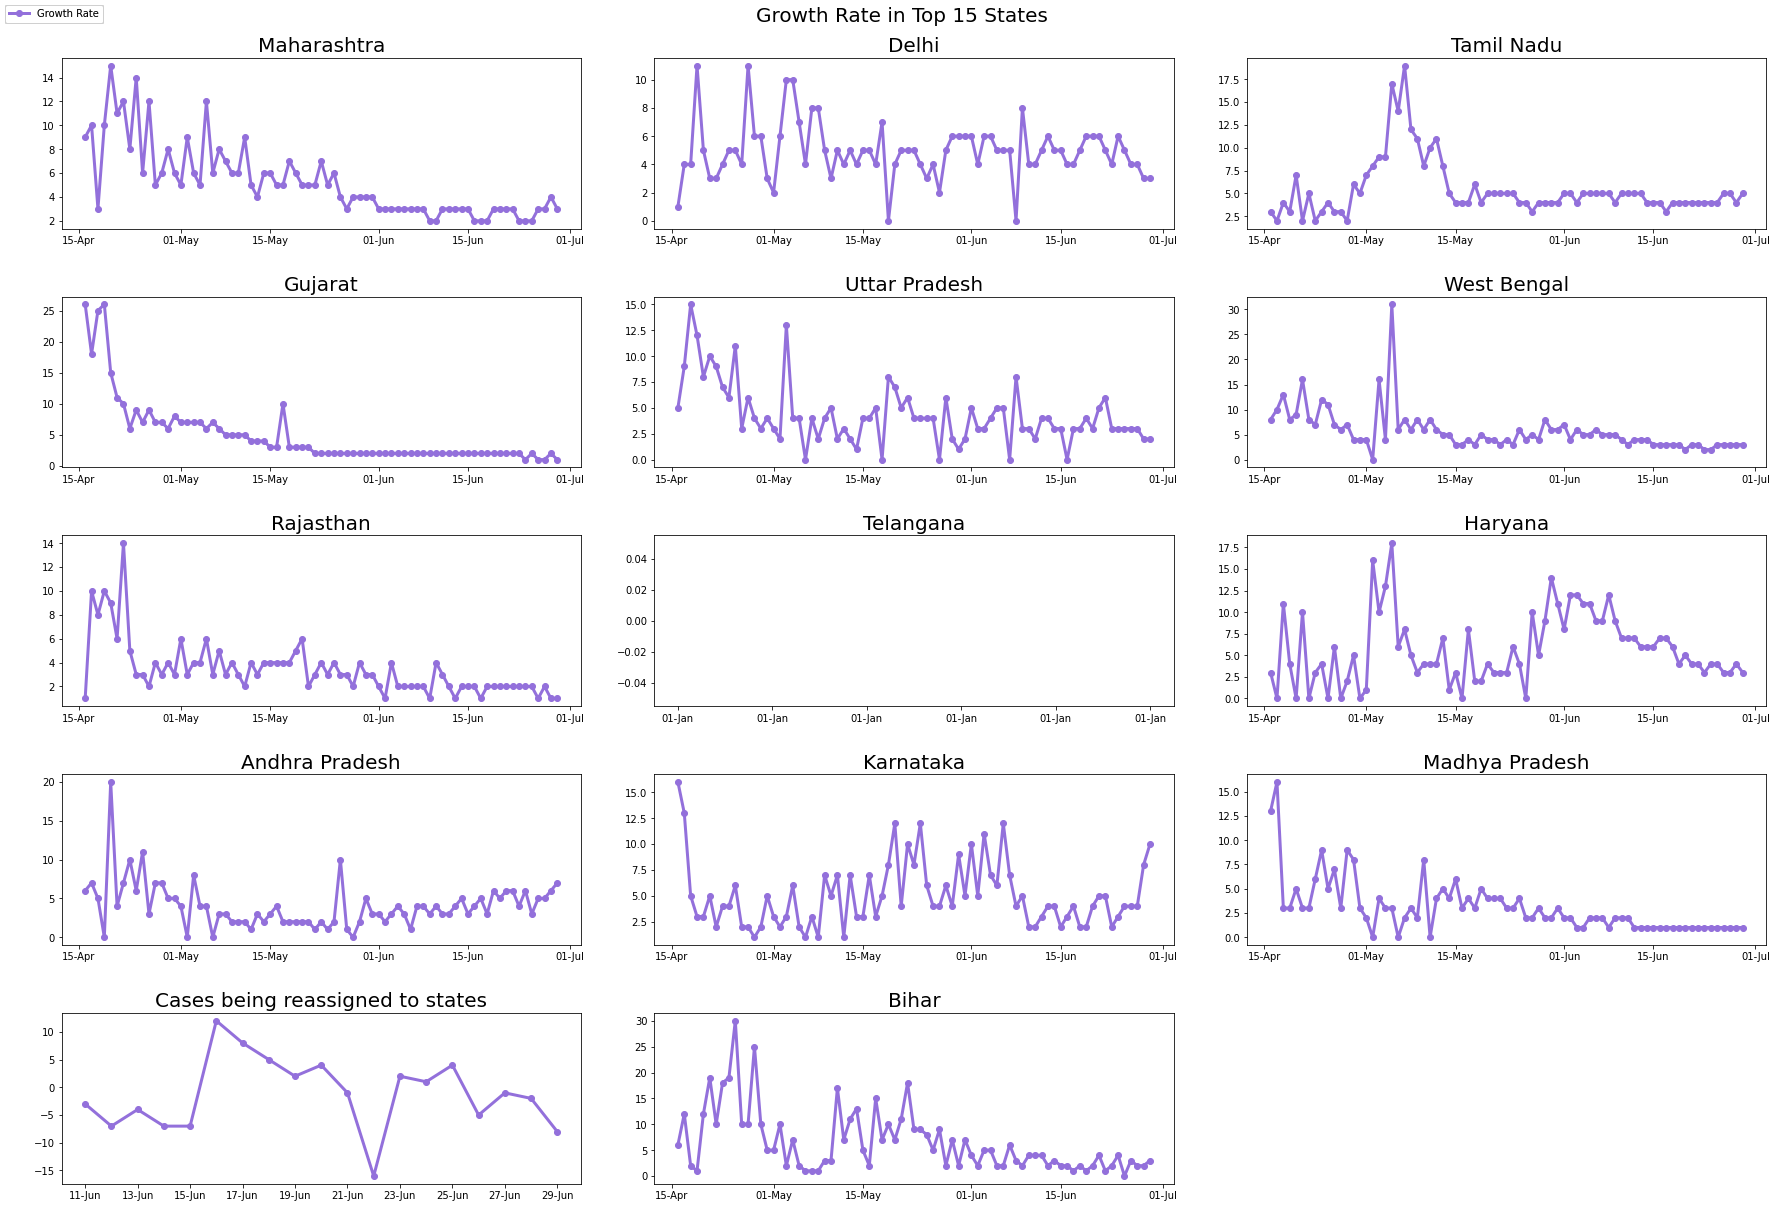

In [ ]:
def calc_growthRate(values):
    k = []
    for i in range(1,len(values)):
        summ = 0
        for j in range(i):
            summ = summ + values[j]
        rate = (values[i]/summ)*100
        k.append(int(rate))
    return k

fig = plt.figure(figsize= (25,17))
plt.suptitle('Growth Rate in Top 15 States',fontsize = 20,y=1.0)
k=0
for i in range(1,15):
    ax = fig.add_subplot(5,3,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    #ax.bar(states_dates[states[k]],states_confirmed[states[k]],label = 'Day wise Confirmed Cases ') 
    growth_rate = calc_growthRate(states_confirmed[states[k]])
    ax.plot_date(states_dates[states[k]][21:],growth_rate[20:],color = '#9370db',label = 'Growth Rate',linewidth =3,linestyle='-')  
    plt.title(states[k],fontsize = 20)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1
plt.tight_layout(pad=3.0)

In [ ]:
cols_object = list(hospital_beds.columns[2:8])

for cols in cols_object:
    hospital_beds[cols] = hospital_beds[cols].astype(int,errors = 'ignore')

hospital_beds = hospital_beds.drop('Sno',axis=1)

In [ ]:
hospital_beds.head(36)

,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500
1,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,Arunachal Pradesh,122,62,NaN,15,199,2320,208,2136,10,268
3,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936
5,Chandigarh,40,2,1.0,4,47,3756,0,0,4,778
6,Chhattisgarh,813,166,12.0,32,1023,14354,169,5070,45,4342
7,Dadra & Nagar Haveli,9,2,1.0,1,13,568,10,273,1,316
8,Daman & Diu,4,2,NaN,2,8,298,5,240,0,0
9,Delhi,534,25,9.0,47,615,20572,0,0,109,24383


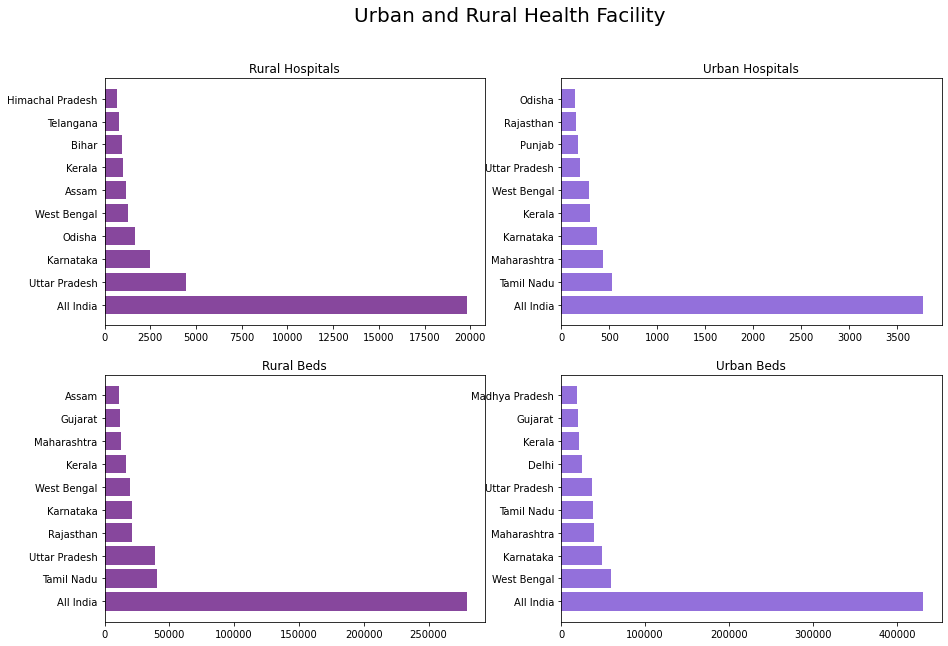

In [ ]:
top_rural_hos = hospital_beds.nlargest(10,'NumRuralHospitals_NHP18')
top_rural_beds = hospital_beds.nlargest(10,'NumRuralBeds_NHP18')
top_urban_hos = hospital_beds.nlargest(10,'NumUrbanHospitals_NHP18')
top_urban_beds = hospital_beds.nlargest(10,'NumUrbanBeds_NHP18')

plt.figure(figsize=(15,10))
plt.suptitle('Urban and Rural Health Facility',fontsize=20)
plt.subplot(221)
plt.title('Rural Hospitals')
plt.barh(top_rural_hos['State/UT'],top_rural_hos['NumRuralHospitals_NHP18'],color = '#87479d');

plt.subplot(222)
plt.title('Urban Hospitals')
plt.barh(top_urban_hos['State/UT'],top_urban_hos['NumUrbanHospitals_NHP18'],color = '#9370db');

plt.subplot(223)
plt.title('Rural Beds')
plt.barh(top_rural_beds['State/UT'],top_rural_beds['NumRuralBeds_NHP18'],color = '#87479d');

plt.subplot(224)
plt.title('Urban Beds')
plt.barh(top_urban_beds['State/UT'],top_urban_beds['NumUrbanBeds_NHP18'],color = '#9370db');

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [ ]:
!pip install Prophet

     |████████████████████████████████| 92kB 2.6MB/s 
  Created wheel for Prophet: filename=prophet-0.1.1.post1-cp36-none-any.whl size=13236 sha256=b56c53bfc0357df818dcda3dd2785b9cdb20202737a5ecb00b9a33dae1e65f9a
  Stored in directory: /root/.cache/pip/wheels/71/d7/4f/0ade9b5843362f84d39c21edbe6065032e388053c4ab0ab83e
Successfully built Prophet


In [ ]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

k = df1[df1['Country/Region']=='India'].loc[:,'1/22/20':]
india_confirmed = k.values.tolist()[0] 
data = pd.DataFrame(columns = ['ds','y'])
data['ds'] = dates
data['y'] = india_confirmed

#confirmed=df.groupby('Date').sum()['Confirmed'].reset_index()
#deaths=df.groupby('Date').sum()['Deaths'].reset_index()
#recovered=df.groupby('Date').sum()['Recovered'].reset_index()


In [ ]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])


In [ ]:
prop = Prophet(interval_width=0.95)
prop.fit(data)
future = prop.make_future_dataframe(periods=15)
future.tail(15)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
159,2020-06-29
160,2020-06-30
161,2020-07-01
162,2020-07-02
163,2020-07-03
164,2020-07-04
165,2020-07-05
166,2020-07-06
167,2020-07-07
168,2020-07-08


In [ ]:
#predicting the future with date, and upper and lower limit of y value
forecast = prop.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
169,2020-07-09,633616.549309,616675.800475,650454.968509
170,2020-07-10,645310.052836,627129.786789,662750.188648
171,2020-07-11,657226.299555,639106.070100,675958.202257
172,2020-07-12,669167.735870,649114.121010,689640.147791
173,2020-07-13,678760.709503,658841.861967,699143.664909


You can plot the forecast by calling the Prophet.plot method and passing in your forecast dataframe.

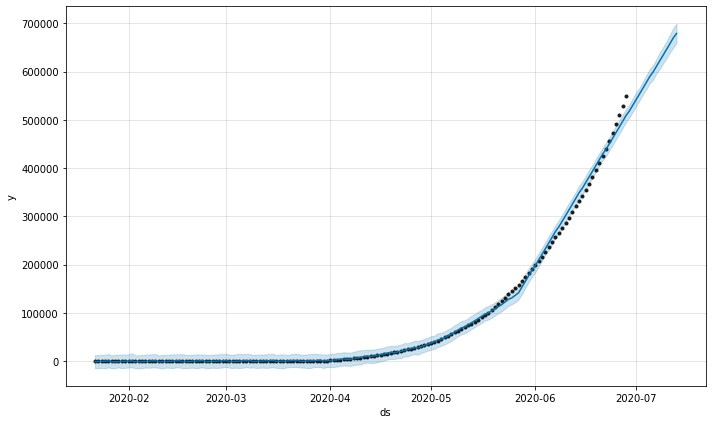

In [ ]:
confirmed_forecast_plot = prop.plot(forecast)

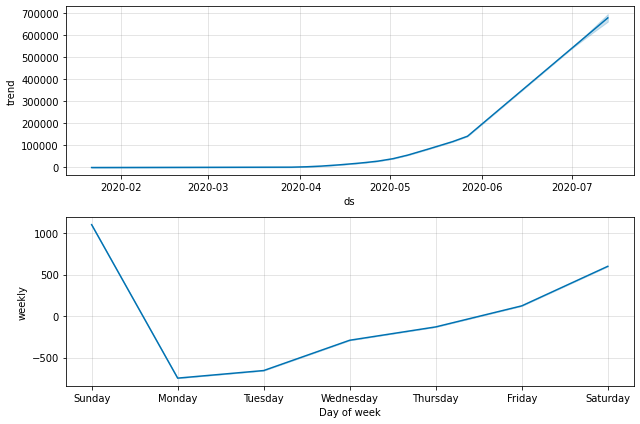

In [ ]:
confirmed_forecast_plot =prop.plot_components(forecast)

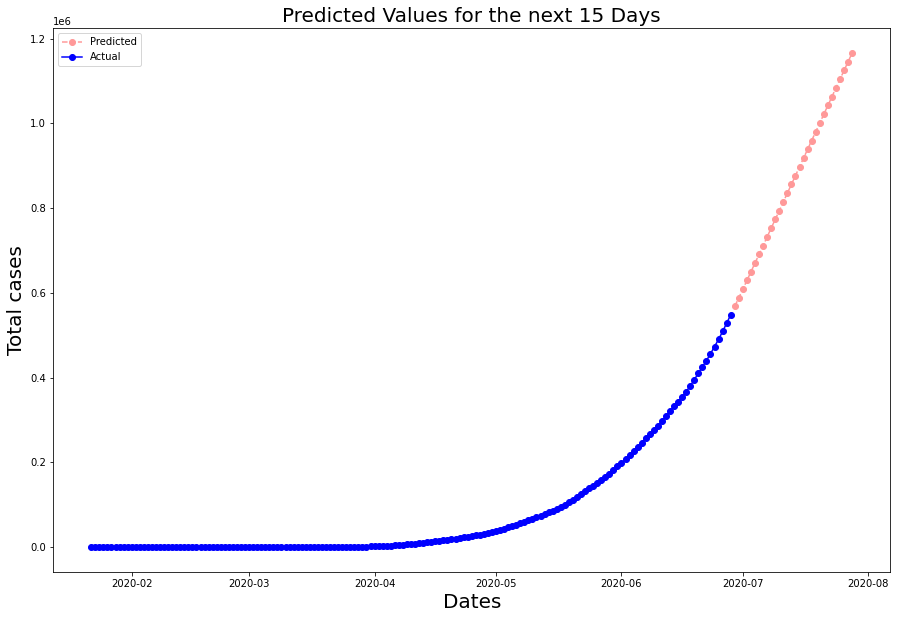

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

from datetime import timedelta 

arima = ARIMA(data['y'], order=(5, 1, 0))
arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 30)
pred = list(forecast[0])

start_date = data['ds'].max()
prediction_dates = []
for i in range(30):
    date = start_date + timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
plt.figure(figsize= (15,10))
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Predicted Values for the next 15 Days" , fontsize = 20)

plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = '#ff9999',label = 'Predicted');
plt.plot_date(y=data['y'],x=data['ds'],linestyle = '-',color = 'blue',label = 'Actual');
plt.legend();

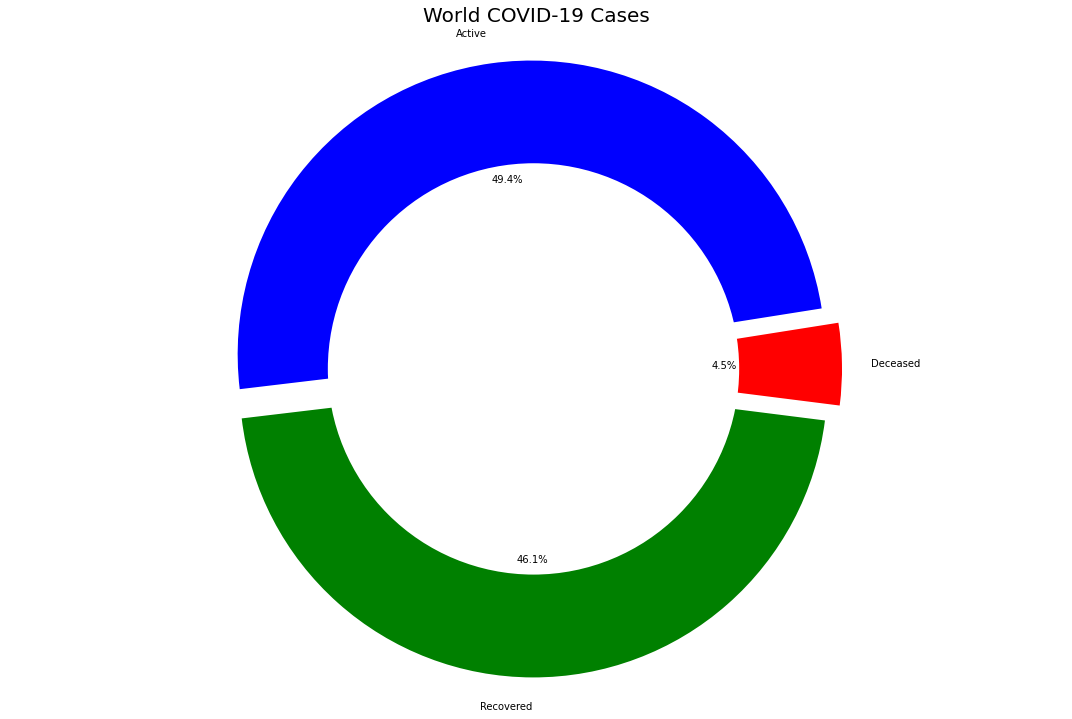

In [ ]:
world_confirmed = confirmed_df[confirmed_df.columns[-1:]].sum()
world_recovered = recovered_df[recovered_df.columns[-1:]].sum()
world_deaths = deaths_df[deaths_df.columns[-1:]].sum()
world_active = world_confirmed - (world_recovered - world_deaths)

labels = ['Active','Recovered','Deceased']
sizes = [world_active,world_recovered,world_deaths]
color= ['blue','green','red']
explode = []

for i in labels:
    explode.append(0.05)
    
plt.figure(figsize= (15,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode = explode,colors = color)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('World COVID-19 Cases',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

In [ ]:
dates

[Timestamp('2020-01-22 00:00:00'),
 Timestamp('2020-01-23 00:00:00'),
 Timestamp('2020-01-24 00:00:00'),
 Timestamp('2020-01-25 00:00:00'),
 Timestamp('2020-01-26 00:00:00'),
 Timestamp('2020-01-27 00:00:00'),
 Timestamp('2020-01-28 00:00:00'),
 Timestamp('2020-01-29 00:00:00'),
 Timestamp('2020-01-30 00:00:00'),
 Timestamp('2020-01-31 00:00:00'),
 Timestamp('2020-02-01 00:00:00'),
 Timestamp('2020-02-02 00:00:00'),
 Timestamp('2020-02-03 00:00:00'),
 Timestamp('2020-02-04 00:00:00'),
 Timestamp('2020-02-05 00:00:00'),
 Timestamp('2020-02-06 00:00:00'),
 Timestamp('2020-02-07 00:00:00'),
 Timestamp('2020-02-08 00:00:00'),
 Timestamp('2020-02-09 00:00:00'),
 Timestamp('2020-02-10 00:00:00'),
 Timestamp('2020-02-11 00:00:00'),
 Timestamp('2020-02-12 00:00:00'),
 Timestamp('2020-02-13 00:00:00'),
 Timestamp('2020-02-14 00:00:00'),
 Timestamp('2020-02-15 00:00:00'),
 Timestamp('2020-02-16 00:00:00'),
 Timestamp('2020-02-17 00:00:00'),
 Timestamp('2020-02-18 00:00:00'),
 Timestamp('2020-02-

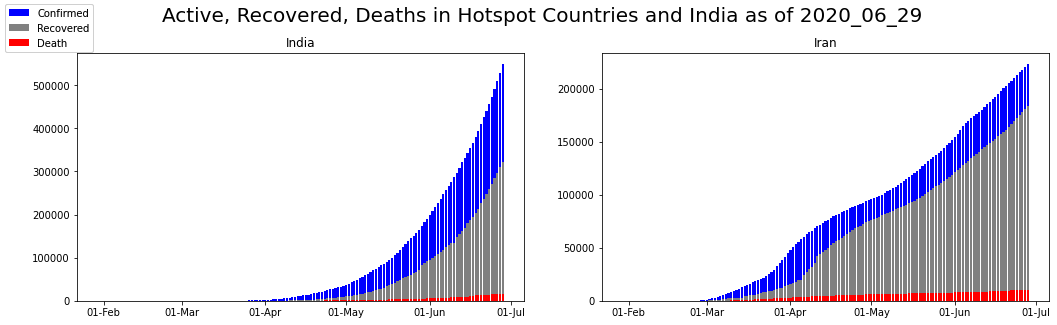

In [ ]:
hotspots = ['India','Iran']
dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
dates_india = dates[8:]

df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()

global_confirmed = {}
global_deaths = {}
global_recovered = {}
global_active= {}

for country in hotspots:
    k =df1[df1['Country/Region'] == country].loc[:,'1/30/20':]
    global_confirmed[country] = k.values.tolist()[0]

    k =df2[df2['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths[country] = k.values.tolist()[0]

    k =df3[df3['Country/Region'] == country].loc[:,'1/30/20':]
    global_recovered[country] = k.values.tolist()[0]
    
    
fig = plt.figure(figsize= (15,25))
plt.suptitle('Active, Recovered, Deaths in Hotspot Countries and India as of '+ today,fontsize = 20,y=1.0)
#plt.legend()
k=0
for i in range(1,3):
    ax = fig.add_subplot(6,2,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    # ax.bar(dates_india,global_active[hotspots[k]],color = 'green',alpha = 0.6,label = 'Active');
    ax.bar(dates_india,global_confirmed[hotspots[k]],color='blue',label = 'Confirmed');
    ax.bar(dates_india,global_recovered[hotspots[k]],color='grey',label = 'Recovered');
    ax.bar(dates_india,global_deaths[hotspots[k]],color='red',label = 'Death');   
    plt.title(hotspots[k])
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1

plt.tight_layout(pad=3.0)

In [ ]:
countries = ['India','Iran']

global_confirmed = []
global_recovered = []
global_deaths = []

for country in countries:
    k =df1[df1['Country/Region'] == country].loc[:,'1/30/20':]
    global_confirmed.append(k.values.tolist()[0]) 

    k =df2[df2['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths.append(k.values.tolist()[0]) 

    k =df3[df3['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths.append(k.values.tolist()[0])  

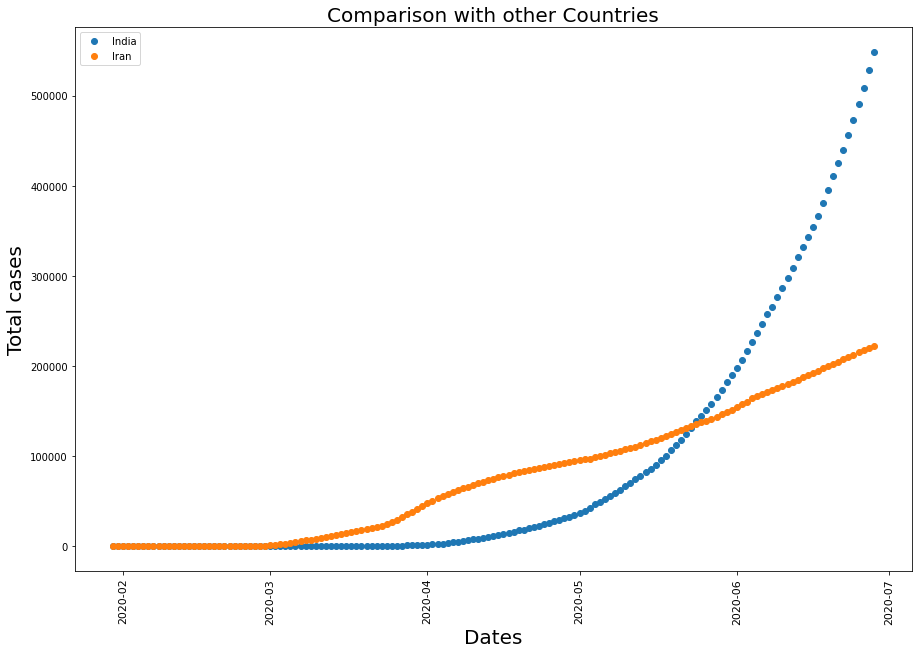

In [ ]:
plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Comparison with other Countries" , fontsize = 20)

for i in range(len(countries)):
    plt.plot_date(y= global_confirmed[i],x= dates_india,label = countries[i])
plt.legend();